In [3]:
pip install arch

  Obtaining dependency information for arch from https://files.pythonhosted.org/packages/37/08/acd7fbc1e15b4701b5be3acd6fd575865a274885ea6bc72ec7af909cc7e5/arch-7.0.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/924.9 kB ? eta -:--:--
    --------------------------------------- 20.5/924.9 kB ? eta -:--:--
    --------------------------------------- 20.5/924.9 kB ? eta -:--:--
   -- ------------------------------------ 51.2/924.9 kB 435.7 kB/s eta 0:00:03
   ---- --------------------------------- 102.4/924.9 kB 653.6 kB/s eta 0:00:02
   ---------- ----------------------------- 235.5/924.9 kB 1.2 MB/s eta 0:00:01
   --------------- ------------------------ 368.6/924.9 kB 1.5 MB/s eta 0:00:01
   ----------------------- ---------------- 532.5/924.9 kB 2.0 MB/s eta 0:00:01
   ----------------------------------- --

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [19]:
# Download data
ticker = "LT.NS"  # Adjust the ticker as per the Yahoo Finance listing
start_date = '2022-04-01'
end_date = '2024-03-31'

data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [20]:
returns = 100 * data['Adj Close'].pct_change().dropna()  # Calculate returns

In [21]:
# Display the first few rows of the data
print(data.head())

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-04-01  1759.000000  1794.000000  1759.000000  1790.099976  1734.073120   
2022-04-04  1784.000000  1829.849976  1776.599976  1826.349976  1769.188721   
2022-04-05  1840.000000  1845.000000  1827.000000  1836.050049  1778.585083   
2022-04-06  1833.000000  1858.000000  1827.699951  1852.800049  1794.810791   
2022-04-07  1849.900024  1855.849976  1810.150024  1826.300049  1769.140137   

             Volume  
Date                 
2022-04-01  2050573  
2022-04-04  1955281  
2022-04-05  1718581  
2022-04-06  2245496  
2022-04-07  2003954  


In [22]:
# Calculate returns
data['Return'] = 100 * data['Adj Close'].pct_change().dropna()  # Calculate returns
data = data.dropna()  # Drop rows with NaN values resulting from pct_change()

In [23]:
# Check for ARCH effects using the Ljung-Box test on squared returns
lb_test = sm.stats.diagnostic.acorr_ljungbox(data['Return']**2, lags=[10], return_df=True)
print('Ljung-Box test for ARCH effects:')
print(lb_test)

Ljung-Box test for ARCH effects:
      lb_stat  lb_pvalue
10  17.995987   0.055031


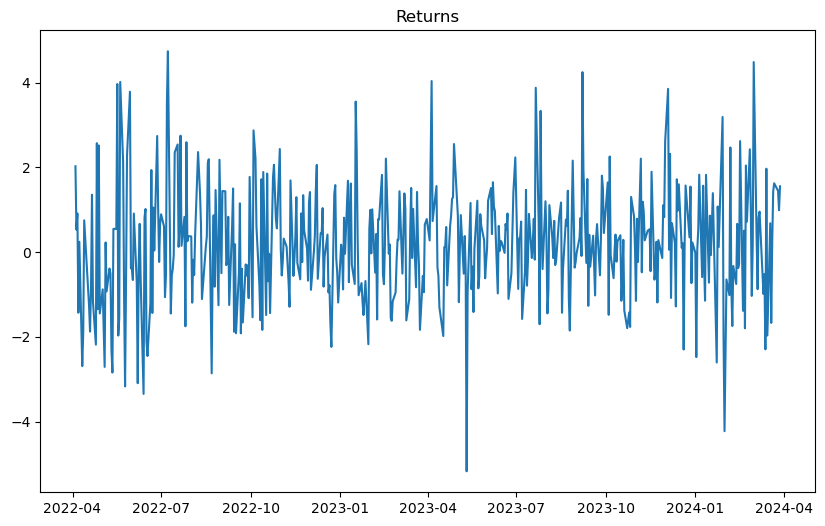

In [24]:
# Check for ARCH/GARCH effects
plt.figure(figsize=(10, 6))
plt.plot(returns)
plt.title('Returns')
plt.show()

In [25]:
# Fit an ARCH/GARCH model
model = arch_model(returns, vol='Garch', p=1, q=1)
results = model.fit(disp='off')
print(results.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -848.785
Distribution:                  Normal   AIC:                           1705.57
Method:            Maximum Likelihood   BIC:                           1722.35
                                        No. Observations:                  491
Date:                Mon, Jul 22 2024   Df Residuals:                      490
Time:                        22:39:42   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1826  6.098e-02      2.994  2.755e-03 [6.304e-0

In [26]:
# Forecast the three-month volatility
forecast = results.forecast(horizon=90)
volatility_forecast = forecast.variance[-1:]  # Last forecasted variance
volatility_forecast = volatility_forecast.apply(lambda x: x**0.5)  # Convert to standard deviation
print(volatility_forecast)

                h.01      h.02      h.03     h.04      h.05      h.06  \
Date                                                                    
2024-03-28  1.368204  1.367101  1.366013  1.36494  1.363883  1.362842   

                h.07      h.08      h.09      h.10  ...      h.81      h.82  \
Date                                                ...                       
2024-03-28  1.361815  1.360803  1.359805  1.358822  ...  1.315757  1.315417   

                h.83      h.84      h.85      h.86      h.87      h.88  \
Date                                                                     
2024-03-28  1.315082  1.314752  1.314428  1.314107  1.313792  1.313481   

                h.89      h.90  
Date                            
2024-03-28  1.313175  1.312874  

[1 rows x 90 columns]


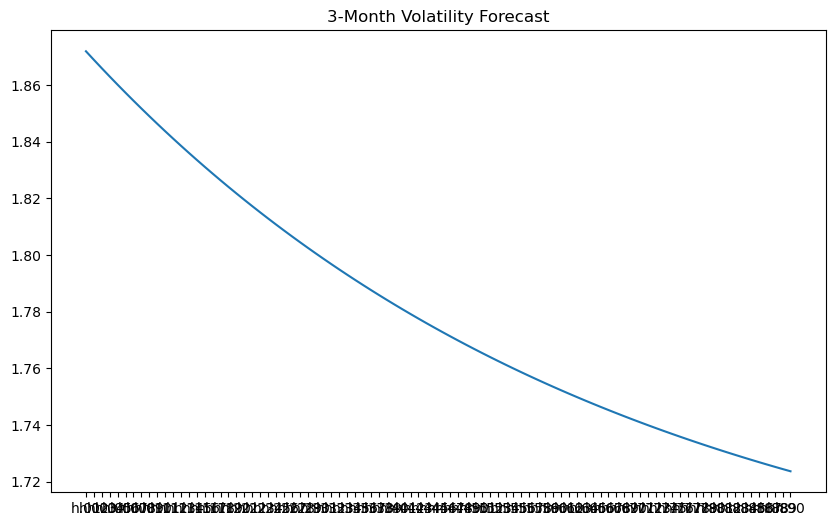

In [27]:
# Plot the forecast
plt.figure(figsize=(10,6))
plt.plot(forecast.variance[-1:].T)
plt.title('3-Month Volatility Forecast')
plt.show()

## **Part B**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
from statsmodels.tsa.stattools import adfuller

In [20]:
# Load the data from the Excel file
file_path = 'CMO-Historical-Data-Monthly.xlsx'
df = pd.read_excel(file_path, sheet_name='Monthly Prices', skiprows=6)

In [21]:
# Rename the first column to "Date"
df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

# Convert the Date column to datetime format
def parse_date(date_str):
    year, month = date_str[:4], date_str[5:7]
    return pd.to_datetime(f'{year}-{month}-01')

df['Date'] = df['Date'].apply(parse_date)

# Display the structure of the dataframe
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           774 non-null    datetime64[ns]
 1   CRUDE_PETRO    774 non-null    float64       
 2   CRUDE_BRENT    774 non-null    float64       
 3   CRUDE_DUBAI    774 non-null    float64       
 4   CRUDE_WTI      774 non-null    object        
 5   COAL_AUS       774 non-null    object        
 6   COAL_SAFRICA   774 non-null    object        
 7   NGAS_US        774 non-null    float64       
 8   NGAS_EUR       774 non-null    float64       
 9   NGAS_JP        774 non-null    object        
 10  iNATGAS        774 non-null    object        
 11  COCOA          774 non-null    float64       
 12  COFFEE_ARABIC  774 non-null    float64       
 13  COFFEE_ROBUS   774 non-null    float64       
 14  TEA_AVG        774 non-null    float64       
 15  TEA_COLOMBO    774 non-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          774 non-null    datetime64[ns]
 1   soybeans      774 non-null    float64       
 2   soybean_oil   774 non-null    float64       
 3   soybean_meal  774 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 24.3 KB
None


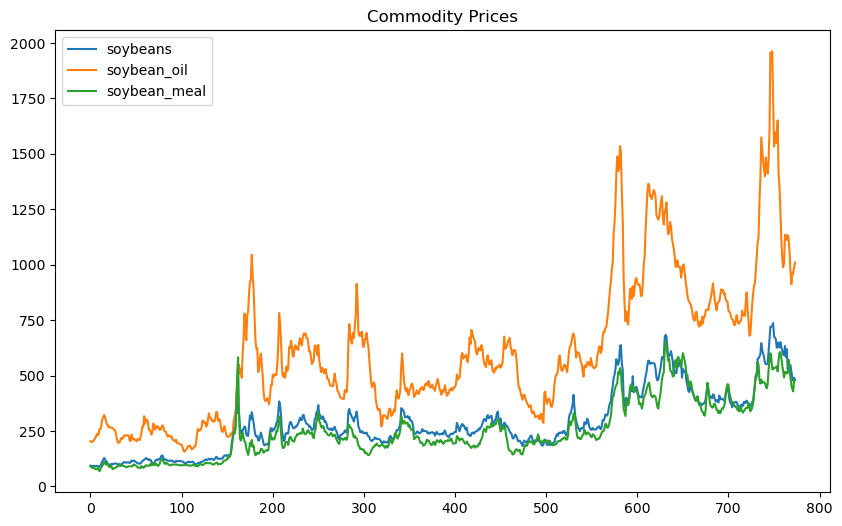

In [31]:
# Get the column numbers for each column
column_numbers = {col: idx for idx, col in enumerate(df.columns)}

# Select relevant columns
commodity = df.iloc[:, [0, 24, 25, 26]]

# Clean column names
commodity.columns = commodity.columns.str.lower().str.replace(' ', '_')

# Display the structure of the commodity dataframe
print(commodity.info())


# Exclude the Date column
commodity_data = commodity.drop(columns=['date'])


commodity_data.plot(figsize=(10, 6))
plt.title('Commodity Prices')
plt.show()




In [24]:
# Step 3: Check for stationarity using ADF test
def adf_test(series, title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, val in result[4].items():
        out[f'Critical Value ({key})'] = val
    print(out)
    print('')

# Apply ADF test for each commodity
for column in commodity_data.columns:
    adf_test(commodity_data[column], title=column)

Augmented Dickey-Fuller Test: soybeans
ADF Test Statistic              -2.423146
p-value                          0.135310
# Lags Used                      2.000000
Number of Observations Used    771.000000
Critical Value (1%)             -3.438860
Critical Value (5%)             -2.865296
Critical Value (10%)            -2.568770
dtype: float64

Augmented Dickey-Fuller Test: soybean_oil
ADF Test Statistic              -2.449005
p-value                          0.128380
# Lags Used                     14.000000
Number of Observations Used    759.000000
Critical Value (1%)             -3.438995
Critical Value (5%)             -2.865355
Critical Value (10%)            -2.568802
dtype: float64

Augmented Dickey-Fuller Test: soybean_meal
ADF Test Statistic              -2.193184
p-value                          0.208728
# Lags Used                      3.000000
Number of Observations Used    770.000000
Critical Value (1%)             -3.438871
Critical Value (5%)             -2.865301
Crit

In [25]:
# Step 4: Differencing the series if not stationary
commodity_data_diff = commodity_data.diff().dropna()

# Convert all columns to numeric (if they are not already)
commodity_data_diff =commodity_data_diff.apply(pd.to_numeric, errors='coerce')

# Handle any potential NaN values that might be introduced
commodity_data_diff = commodity_data_diff.dropna()

# Check stationarity of differenced data
for column in commodity_data_diff.columns:
    adf_test(commodity_data_diff[column], title=f'{column} Differenced')

Augmented Dickey-Fuller Test: soybeans Differenced
ADF Test Statistic            -1.069453e+01
p-value                        3.653460e-19
# Lags Used                    9.000000e+00
Number of Observations Used    7.630000e+02
Critical Value (1%)           -3.438950e+00
Critical Value (5%)           -2.865335e+00
Critical Value (10%)          -2.568791e+00
dtype: float64

Augmented Dickey-Fuller Test: soybean_oil Differenced
ADF Test Statistic            -7.296610e+00
p-value                        1.372699e-10
# Lags Used                    2.100000e+01
Number of Observations Used    7.510000e+02
Critical Value (1%)           -3.439087e+00
Critical Value (5%)           -2.865396e+00
Critical Value (10%)          -2.568823e+00
dtype: float64

Augmented Dickey-Fuller Test: soybean_meal Differenced
ADF Test Statistic            -1.174149e+01
p-value                        1.270560e-21
# Lags Used                    7.000000e+00
Number of Observations Used    7.650000e+02
Critical Value (

In [26]:
# Step 5: Fit VAR model if series are stationary
# Automatically select the optimal lag length based on information criteria
model = VAR(commodity_data_diff)
lag_order = model.select_order().aic  # Select lag length based on AIC
print(f'Selected Lag Length: {lag_order}')

# Fit the VAR model with the selected lag length
results = model.fit(lag_order)
print(results.summary())

C:\Users\RIDDHI\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Selected Lag Length: 10
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 24, Jul, 2024
Time:                     17:14:35
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    18.9749
Nobs:                     763.000    HQIC:                   18.6273
Log likelihood:          -10178.3    FPE:                9.89235e+07
AIC:                      18.4097    Det(Omega_mle):     8.77832e+07
--------------------------------------------------------------------
Results for equation soybeans
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.514571         0.675969            0.761           0.447
L1.soybeans             -0.161156         0.051949           -3.102           0.002
L1.soybean_oil       

[119.60185454  49.10113839  16.4403223 ]
[70.50071616 32.66081608 16.4403223 ]
Det. terms outside the coint. relation & lagged endog. parameters for equation soybeans
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.9531      0.891      3.316      0.001       1.208       4.699
L1.soybeans         0.0099      0.055      0.182      0.855      -0.097       0.117
L1.soybean_oil      0.0833      0.020      4.214      0.000       0.045       0.122
L1.soybean_meal     0.1339      0.045      2.982      0.003       0.046       0.222
L2.soybeans         0.0255      0.052      0.487      0.626      -0.077       0.128
L2.soybean_oil     -0.0127      0.020     -0.630      0.528      -0.052       0.027
L2.soybean_meal    -0.0238      0.041     -0.581      0.561      -0.104       0.056
Det. terms outside the coint. relation & lagged endog. parameters for equatio

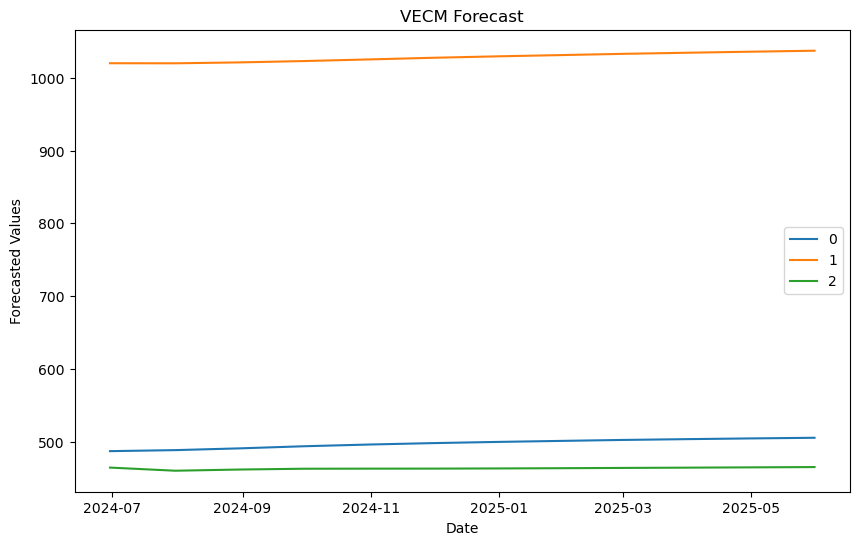

In [27]:
# Exclude the Date column
commodity_data = commodity.drop(columns=['date'])

# Perform the Johansen cointegration test
johansen_test = coint_johansen(commodity_data, det_order=1, k_ar_diff=2)
print(johansen_test.lr1)  # Trace statistic
print(johansen_test.lr2)  # Max-eigen statistic

# Fit the VECM model
vecm = VECM(commodity_data, k_ar_diff=2, coint_rank=1, deterministic='co')
vecm_fit = vecm.fit()

# Display the summary of the VECM model
print(vecm_fit.summary())

# Forecasting 12 steps ahead
forecast = vecm_fit.predict(steps=12)

# Convert forecast to DataFrame for plotting
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=commodity['date'].iloc[-1], periods=12, freq='M'))

# Plotting the forecast
plt.figure(figsize=(10, 6))
for col in forecast_df.columns:
    plt.plot(forecast_df.index, forecast_df[col], label=col)

plt.legend()
plt.title('VECM Forecast')
plt.xlabel('Date')
plt.ylabel('Forecasted Values')
plt.show()
